In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import shapefile
import pyproj

#! /usr/bin/env python3

# data libraries
import sys
import os
import datetime as dt  # Python standard library datetime  module
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from netCDF4 import Dataset,num2date  # http://code.google.com/p/netcdf4-python/
import pandas as pd
import geopandas as gpd
from pyproj import Proj, transform
from matplotlib.path import Path

# plotting libraries
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import linregress
import matplotlib.style as style
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point 
import cartopy.mpl.ticker as cticker
import glob
import array

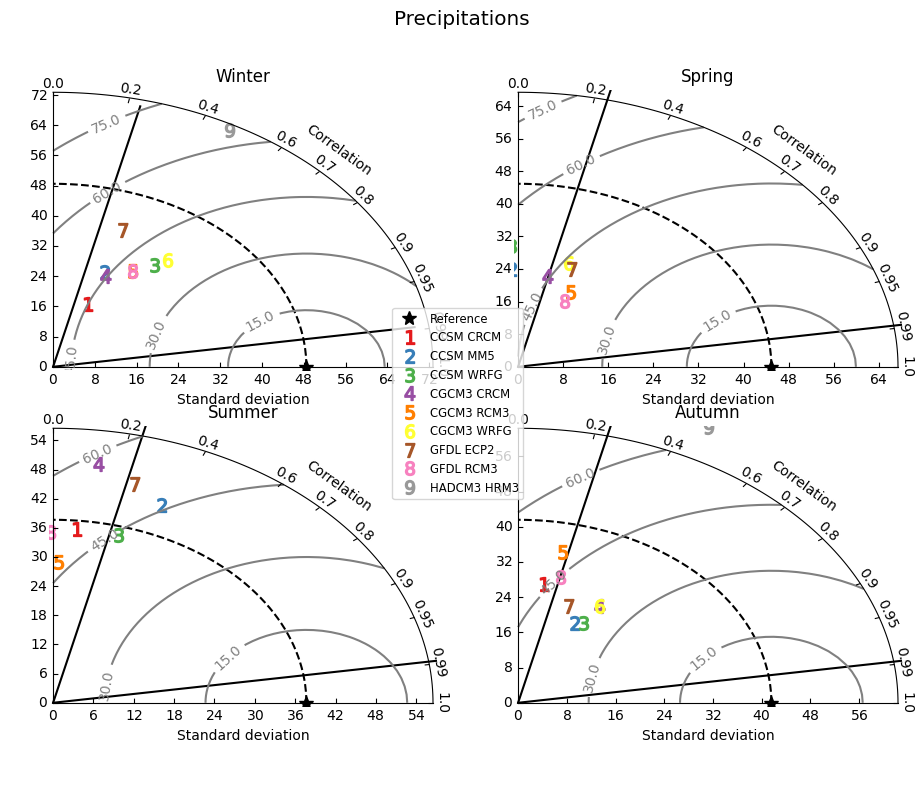

In [2]:
from taylorDiagram import TaylorDiagram
import numpy as NP
import matplotlib.pyplot as PLT

# Reference std
stdrefs = dict(winter=48.491,
               spring=44.927,
               summer=37.664,
               autumn=41.589)

# Sample std,rho: Be sure to check order and that correct numbers are placed!
samples = dict(winter=[[17.831, 0.360, "CCSM CRCM"],
                       [27.062, 0.360, "CCSM MM5"],
                       [33.125, 0.585, "CCSM WRFG"],
                       [25.939, 0.385, "CGCM3 CRCM"],
                       [29.593, 0.509, "CGCM3 RCM3"],
                       [35.807, 0.609, "CGCM3 WRFG"],
                       [38.449, 0.342, "GFDL ECP2"],
                       [29.593, 0.509, "GFDL RCM3"],
                       [71.215, 0.473, "HADCM3 HRM3"]],
               spring=[[32.174, -0.262, "CCSM CRCM"],
                       [24.042, -0.055, "CCSM MM5"],
                       [29.647, -0.040, "CCSM WRFG"],
                       [22.820, 0.222, "CGCM3 CRCM"],
                       [20.505, 0.445, "CGCM3 RCM3"],
                       [26.917, 0.332, "CGCM3 WRFG"],
                       [25.776, 0.366, "GFDL ECP2"],
                       [18.018, 0.452, "GFDL RCM3"],
                       [79.875, 0.447, "HADCM3 HRM3"]],
               summer=[[35.863, 0.096, "CCSM CRCM"],
                       [43.771, 0.367, "CCSM MM5"],
                       [35.890, 0.267, "CCSM WRFG"],
                       [49.658, 0.134, "CGCM3 CRCM"],
                       [28.972, 0.027, "CGCM3 RCM3"],
                       [60.396, 0.191, "CGCM3 WRFG"],
                       [46.529, 0.258, "GFDL ECP2"],
                       [35.230, -0.014, "GFDL RCM3"],
                       [87.562, 0.503, "HADCM3 HRM3"]],
               autumn=[[27.374, 0.150, "CCSM CRCM"],
                       [20.270, 0.451, "CCSM MM5"],
                       [21.070, 0.505, "CCSM WRFG"],
                       [25.666, 0.517, "CGCM3 CRCM"],
                       [35.073, 0.205, "CGCM3 RCM3"],
                       [25.666, 0.517, "CGCM3 WRFG"],
                       [23.409, 0.353, "GFDL ECP2"],
                       [29.367, 0.235, "GFDL RCM3"],
                       [70.065, 0.444, "HADCM3 HRM3"]])

# Colormap (see http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps)
colors = PLT.matplotlib.cm.Set1(NP.linspace(0,1,len(samples['winter'])))

# Here set placement of the points marking 95th and 99th significance
# levels. For more than 102 samples (degrees freedom > 100), critical
# correlation levels are 0.195 and 0.254 for 95th and 99th
# significance levels respectively. Set these by eyeball using the
# standard deviation x and y axis.

#x95 = [0.01, 0.68] # For Tair, this is for 95th level (r = 0.195)
#y95 = [0.0, 3.45]
#x99 = [0.01, 0.95] # For Tair, this is for 99th level (r = 0.254)
#y99 = [0.0, 3.45]

x95 = [0.05, 13.9] # For Prcp, this is for 95th level (r = 0.195)
y95 = [0.0, 71.0]
x99 = [0.05, 19.0] # For Prcp, this is for 99th level (r = 0.254)
y99 = [0.0, 70.0]

rects = dict(winter=221,
             spring=222,
             summer=223,
             autumn=224)

fig = PLT.figure(figsize=(11,8))
fig.suptitle("Precipitations", size='x-large')

for season in ['winter','spring','summer','autumn']:

    dia = TaylorDiagram(stdrefs[season], fig=fig, rect=rects[season],
                        label='Reference')

    dia.ax.plot(x95,y95,color='k')
    dia.ax.plot(x99,y99,color='k')

    # Add samples to Taylor diagram
    for i,(stddev,corrcoef,name) in enumerate(samples[season]):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       #mfc='k', mec='k', # B&W
                       mfc=colors[i], mec=colors[i], # Colors
                       label=name)

    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5') # 5 levels
    dia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
    # Tricky: ax is the polar ax (used for plots), _ax is the
    # container (used for layout)
    dia._ax.set_title(season.capitalize())

# Add a figure legend and title. For loc option, place x,y tuple inside [ ].
# Can also use special options here:
# http://matplotlib.sourceforge.net/users/legend_guide.html

fig.legend(dia.samplePoints,
           [ p.get_label() for p in dia.samplePoints ],
           numpoints=1, prop=dict(size='small'), loc='center')

fig.tight_layout()

#PLT.savefig('test_taylor_4panel.png')
PLT.show()

In [5]:
%pip install SkillMetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 12.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install SkillMetrics --upgrade

Note: you may need to restart the kernel to use updated packages.


In [9]:
import skill_metrics as sm

In [10]:
sm.taylor_diagram(sdev,crmsd,ccoef, styleOBS = '-', colOBS = 'r', markerobs = 'o', titleOBS = 'observation')

In [13]:
python taylor14.py 

UsageError: %%python is a cell magic, but the cell body is empty.


In [16]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import skill_metrics as sm
from sys import version_info

if __name__ == '__main__':

    # Define optional arguments for script
    arg_parser = argparse.ArgumentParser()
    arg_parser.add_argument('-noshow', dest='no_show', action='store_true',
                            help="No figure is shown if this flag is present.")
    arg_parser.add_argument('-nosave', dest='no_save', action='store_true',
                            help="No figure is saved if this flag is present.")
    args = arg_parser.parse_args()
    del arg_parser
    
    # Close any previously open graphics windows
    plt.close('all')
    
    # Read data from CSV files
    #data_files = ['pred1.csv', 'pred2.csv', 'pred3.csv', 'ref.csv']
    #data = load_data(data_files)

    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    #taylor_stats1 = sm.taylor_statistics(data['pred1'],data['ref'],'data')
    #taylor_stats2 = sm.taylor_statistics(data['pred2'],data['ref'],'data')
    #taylor_stats3 = sm.taylor_statistics(data['pred3'],data['ref'],'data')
    
    # Store statistics in arrays
    #sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     #taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
    #crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      #taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
    #ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      #taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    label = 
    
    '''
    Produce the Taylor diagram
    Display the data points for correlations that vary from -1 to 1 (2
    panels). Label the points and change the axis options for SDEV, CRMSD,
    and CCOEF. Increase the upper limit for the SDEV axis and rotate the
    CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
    line style choices for SDEV, CRMSD, and CCOEFF variables to show effect. 
    Increase the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef,
                      numberPanels = 2,
                      markerLabel = label, markerLabelColor = 'r',
                      tickRMS = range(0,90,10), tickRMSangle = 150.0,
                      colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                      titleRMS = 'off',
                      tickSTD = range(0, 80, 20), axismax = 60.0,
                      colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                      colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

    # Write plot to file if arguments say so
    None if args.no_save else plt.savefig('taylor7.png')

    # Show plot if arguments say so
    None if args.no_show else plt.show()
    plt.close()

IndentationError: unexpected indent (3673728664.py, line 35)